<a href="https://colab.research.google.com/github/atalaydenknalbant/DBDA.X425_Assignments/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.datasets import fashion_mnist

## Loading Dataset

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

# Flattening Image data
x_train_reshape = x_train.reshape(-1,28*28).astype('float32')/255.0
x_test_reshape = x_test.reshape(-1,28*28).astype('float32')/255.0

# Defining Class Names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Display image from df

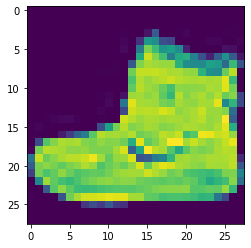

In [3]:
plt.imshow(x_train[0])
plt.show()

## Create a class for defining layer

In [4]:
class CustomDenseLayer(layers.Layer):

  def __init__(self,units,Name):
    super(CustomDenseLayer,self).__init__()
    self.units = units
    self.Name = Name

  def build(self,input_shape):
    self.w = self.add_weight(
        name='w'
        ,shape=(input_shape[-1],self.units)
        ,initializer = 'random_uniform'
        ,trainable=True
    )

    self.b = self.add_weight(
        name='b'
        ,shape=(self.units,)
        ,initializer='zeros'
        ,trainable=True
    )

  def call(self,inputs):
    return tf.matmul(inputs,self.w) + self.b


## Create a class for defining model

In [5]:
class CustomModel(tf.keras.Model):
  def __init__(self,num_classes=10):
    super(CustomModel,self).__init__()
    self.dense1 = CustomDenseLayer(128, Name='layer1')
    self.dense2 = CustomDenseLayer(64, Name='layer2')
    self.dense3 = CustomDenseLayer(num_classes, Name='outputlayer')
  def call(self,inputs):
    x=tf.nn.relu(self.dense1(inputs))
    x=tf.nn.relu(self.dense2(x))
    return self.dense3(x)
model = CustomModel()

## Compile model

In [6]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

## Train Model

In [7]:
model.fit(x_train_reshape, y_train, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 5s - loss: 0.5477 - accuracy: 0.8018
Epoch 2/10
1875/1875 - 4s - loss: 0.3841 - accuracy: 0.8612
Epoch 3/10
1875/1875 - 4s - loss: 0.3440 - accuracy: 0.8732
Epoch 4/10
1875/1875 - 4s - loss: 0.3176 - accuracy: 0.8834
Epoch 5/10
1875/1875 - 4s - loss: 0.2997 - accuracy: 0.8881
Epoch 6/10
1875/1875 - 4s - loss: 0.2835 - accuracy: 0.8940
Epoch 7/10
1875/1875 - 4s - loss: 0.2705 - accuracy: 0.8987
Epoch 8/10
1875/1875 - 4s - loss: 0.2593 - accuracy: 0.9026
Epoch 9/10
1875/1875 - 4s - loss: 0.2488 - accuracy: 0.9072
Epoch 10/10
1875/1875 - 4s - loss: 0.2407 - accuracy: 0.9085


## Evaluate Model

In [8]:
model.evaluate(x_test_reshape, y_test, verbose=2)

313/313 - 1s - loss: 0.3528 - accuracy: 0.8817


[0.35284072160720825, 0.8816999793052673]

## Prediction

313/313 - 0s


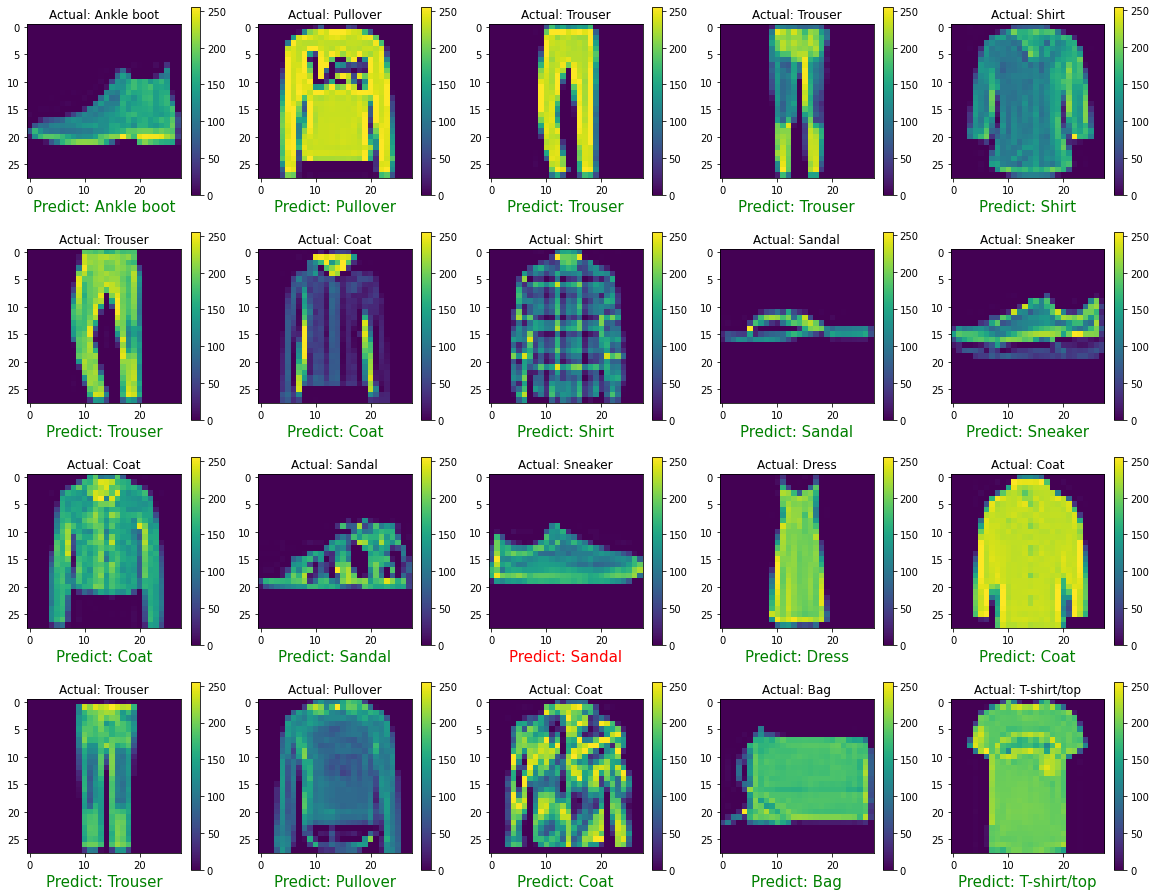

In [9]:
model.predict(x_test_reshape)
predictions = model.predict(x_test_reshape,verbose=2)
i=0

fig = plt.figure(figsize=(20, 20))
for e in zip(y_test, predictions):
  fig.add_subplot(5, 5, i+1)
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  color = 'green' if class_names[y_test[i]] == class_names[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {class_names[y_test[i]]}")
  plt.xlabel(f"Predict: {class_names[np.argmax(predictions[i])]}",color=color,fontsize=15)
  i+=1
  if i == 20:
    break
